In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from tabulate import tabulate


# --- 1. Cargar la base de datos
ruta = "C:/Users/Choco/Downloads/base_respondieron_patagonia.csv"
datos = pd.read_csv(ruta, low_memory=False)

# --- 2. Crear variables necesarias
datos['edad'] = pd.to_numeric(datos['CH06'], errors='coerce')
datos['edad2'] = datos['edad'] ** 2
datos['mujer'] = datos['CH04'].replace({1: 0, 2: 1, 9: np.nan})
datos['educ'] = pd.to_numeric(datos['PP07H'], errors='coerce')

# --- 3. Crear variable binaria 'ocupacion'
# (1 = ocupado, 2 = desocupado, los demás se descartan)
datos['ocupacion'] = datos['ESTADO'].replace({1: 1, 2: 0})
datos['ocupacion'] = pd.to_numeric(datos['ocupacion'], errors='coerce')

# --- 4. Mostrar estado general
print("\n🔎 Valores NO nulos por variable:")
print(datos[['edad', 'edad2', 'educ', 'mujer', 'ocupacion']].notnull().sum())

print("\n📌 Valores únicos en 'ocupacion':")
print(datos['ocupacion'].value_counts(dropna=False))

# --- 5. Armar base limpia
modelo = datos[['edad', 'edad2', 'educ', 'mujer', 'ocupacion']].dropna()
print(f"\n📊 Filas válidas después de limpieza: {len(modelo)}")

# --- 6. Separar X e y
X = modelo[['edad', 'edad2', 'educ', 'mujer']]
y = modelo['ocupacion']

# --- 7. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444
)

# --- 8. Tabla de diferencia de medias
media_train = X_train.mean().rename("Media Train")
media_test = X_test.mean().rename("Media Test")
diferencia = (media_train - media_test).rename("Diferencia")

tabla_medias = pd.concat([media_train, media_test, diferencia], axis=1)
print("\n📊 Tabla de diferencia de medias entre Train y Test:")
print(tabla_medias.round(3))
#Cargar la base de datos
ruta = "C:/Users/Choco/Downloads/base_respondieron_patagonia.csv"
datos = pd.read_csv(ruta, low_memory=False)

#Crear variables necesarias
datos['edad'] = pd.to_numeric(datos['CH06'], errors='coerce')
datos['edad2'] = datos['edad'] ** 2
datos['mujer'] = datos['CH04'].replace({1: 0, 2: 1, 9: np.nan})
datos['educ'] = pd.to_numeric(datos['PP07H'], errors='coerce')
datos['ocupacion'] = datos['ESTADO'].replace({1: 1, 2: 0})
datos['ocupacion'] = pd.to_numeric(datos['ocupacion'], errors='coerce')
datos['salario_semanal'] = pd.to_numeric(datos['P21'], errors='coerce')
datos['obra social'] = pd.to_numeric(datos['CH08'], errors='coerce')
datos[ 'jefe/a' ] = pd.to_numeric(datos['CH16'], errors='coerce')

#Armar base limpia
modelo = datos[['edad', 'edad2', 'educ', 'mujer', 'ocupacion', 'salario_semanal', 'obra social', 'jefe/a']].dropna(subset=['ocupacion', 'salario_semanal'])

#Separar X e y
X = modelo[['edad', 'edad2', 'educ', 'mujer']]
y = modelo['ocupacion']

#División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

#Estimar modelos de regresión lineal para ocupados
ocupados_train = modelo[(modelo['ocupacion'] == 1) & (modelo.index.isin(X_train.index))]
X_train_ocupados = ocupados_train[['edad', 'edad2', 'educ', 'mujer', 'obra social', 'jefe/a']]
y_train_ocupados = ocupados_train['salario_semanal']

#Modelos de regresión lineal
modelos = [
    {'nombre': 'Modelo i', 'variables': ['edad']},
    {'nombre': 'Modelo ii', 'variables': ['edad', 'edad2']},
    {'nombre': 'Modelo iii', 'variables': ['edad', 'edad2', 'educ']},
    {'nombre': 'Modelo iv', 'variables': ['edad', 'edad2', 'educ', 'mujer']},
    {'nombre': 'Modelo v', 'variables': ['edad', 'edad2', 'educ', 'mujer', 'obra social', 'jefe/a']}
]

#Imprimir resultados
variables = set()
for modelo in modelos:
    variables.update(modelo['variables'])
variables = sorted(list(variables))

tabla = []
for variable in variables:
    fila = []
    for modelo in modelos:
        X_modelo = sm.add_constant(X_train_ocupados[modelo['variables']])
        model = sm.OLS(y_train_ocupados, X_modelo).fit()
        params = model.params.round(3)
        se = model.bse.round(2)
        if variable in params.index:
            fila.append(str(params[variable]) + " (" + str(se[variable]) + ")")
        else:
            fila.append("")
    tabla.append([variable] + fila)

headers = ["Variable"] + [modelo['nombre'] for modelo in modelos]
print(tabulate(tabla, headers=headers, tablefmt="grid"))


🔎 Valores NO nulos por variable:
edad         5523
edad2        5523
educ         2407
mujer        5523
ocupacion    5523
dtype: int64

📌 Valores únicos en 'ocupacion':
ocupacion
NaN    3264
1.0    2407
3.0    2357
4.0     644
2.0     115
Name: count, dtype: int64

📊 Filas válidas después de limpieza: 2407

📊 Tabla de diferencia de medias entre Train y Test:
       Media Train  Media Test  Diferencia
edad        41.242      40.638       0.604
edad2     1849.440    1793.362      56.078
educ         0.996       1.011      -0.015
mujer        0.446       0.461      -0.015
+-------------+-------------------+---------------------+---------------------+------------------------+------------------------+
| Variable    | Modelo i          | Modelo ii           | Modelo iii          | Modelo iv              | Modelo v               |
+=============+===================+=====================+=====================+========================+========================+
| edad        | 3199.737 (889.83

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Cargar la base de datos
ruta = "C:/Users/Choco/Downloads/base_respondieron_patagonia.csv"
datos = pd.read_csv(ruta, low_memory=False)

# Crear variables necesarias
datos['edad'] = pd.to_numeric(datos['CH06'], errors='coerce')
datos['edad2'] = datos['edad'] ** 2
datos['mujer'] = datos['CH04'].replace({1: 0, 2: 1, 9: np.nan})
datos['educ'] = pd.to_numeric(datos['PP07H'], errors='coerce')
datos['ocupacion'] = datos['ESTADO'].replace({1: 1, 2: 0})
datos['ocupacion'] = pd.to_numeric(datos['ocupacion'], errors='coerce')
datos['salario_semanal'] = pd.to_numeric(datos['P21'], errors='coerce')
datos['Hora social'] = pd.to_numeric(datos['CH08'], errors='coerce')
datos['jefe/a'] = pd.to_numeric(datos['CH16'], errors='coerce')

# Armar base limpia
modelo = datos[['edad', 'edad2', 'educ', 'mujer', 'ocupacion', 'salario_semanal', 'Hora social', 'jefe/a']].dropna(subset=['ocupacion', 'salario_semanal'])

# Separar X e y
X = modelo[['edad', 'edad2', 'educ', 'mujer']]
y = modelo['ocupacion']

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

# Obtener índices de train y test
idx_train = X_train.index
idx_test = X_test.index

# Calcular salario predicho de testeo para cada modelo
ocupados_train = modelo.loc[idx_train]
ocupados_test = modelo.loc[idx_test]

# Estimar modelos de regresión lineal para ocupados
X_train_ocupados = ocupados_train[['edad', 'edad2', 'educ', 'mujer', 'Hora social', 'jefe/a']]
y_train_ocupados = ocupados_train['salario_semanal']

# Eliminar filas con valores NaN
mask = ~(X_train_ocupados.isnull().any(axis=1) | y_train_ocupados.isnull())
X_train_ocupados = X_train_ocupados[mask]
y_train_ocupados = y_train_ocupados[mask]

modelos = [
    {'nombre': 'i', 'variables': ['edad']},
    {'nombre': 'ii', 'variables': ['edad', 'edad2']},
    {'nombre': 'iii', 'variables': ['edad', 'edad2', 'educ']},
    {'nombre': 'iv', 'variables': ['edad', 'edad2', 'educ', 'mujer']},
    {'nombre': 'v', 'variables': ['edad', 'edad2', 'educ', 'mujer', 'Hora social', 'jefe/a']}
]

resultados = []
for modelo in modelos:
    X_modelo_test = sm.add_constant(ocupados_test[modelo['variables']])
    X_modelo_train = sm.add_constant(X_train_ocupados[modelo['variables']])
    model = sm.OLS(y_train_ocupados, X_modelo_train).fit()
    y_pred = model.predict(X_modelo_test)
    mse = np.mean((ocupados_test['salario_semanal'] - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(ocupados_test['salario_semanal'] - y_pred))
    resultados.append([modelo['nombre'], round(mse, 2), round(rmse, 2), round(mae, 2)])

tabla_resultados = pd.DataFrame(resultados, columns=['Modelo', 'MSE test', 'RMSE test', 'MAE test'])
print("Performance por regresión lineal de la predicción de salarios usando la base de testeo")
print("Var. Dep: salario_semanal")
print(tabla_resultados.to_string(index=False))

Performance por regresión lineal de la predicción de salarios usando la base de testeo
Var. Dep: salario_semanal
Modelo     MSE test  RMSE test  MAE test
     i 1.121826e+11  334936.77 293084.68
    ii 8.030168e+10  283375.52 228818.53
   iii 9.134845e+10  302239.05 221376.65
    iv 8.827014e+10  297102.91 219200.90
     v 8.733093e+10  295518.07 214112.22


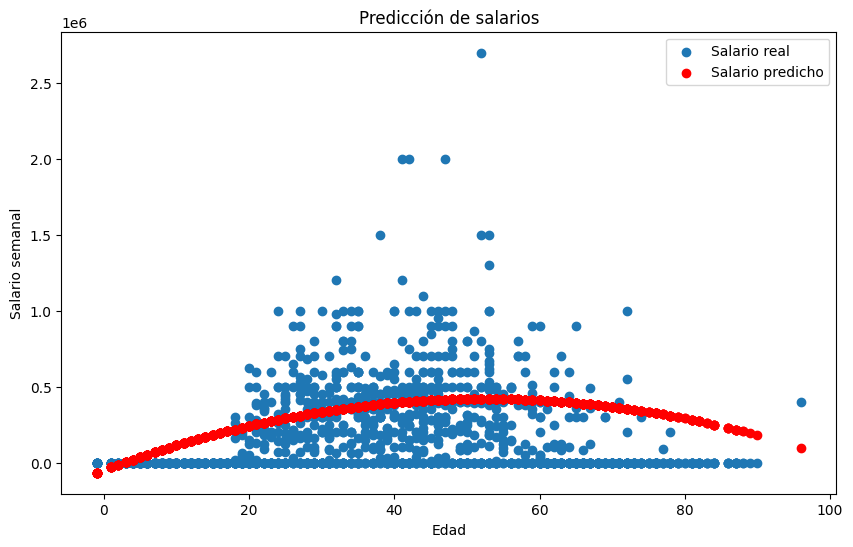

In [46]:
import matplotlib.pyplot as plt

# Identificar el modelo con mejor performance
mejor_modelo_index = np.argmin(tabla_resultados['MSE test'])
mejor_modelo = modelos[mejor_modelo_index]

# Predecir salarios para la base de testeo
X_modelo_test = sm.add_constant(ocupados_test[mejor_modelo['variables']])
X_modelo_train = sm.add_constant(X_train_ocupados[mejor_modelo['variables']])
model = sm.OLS(y_train_ocupados, X_modelo_train).fit()
salario_semanal_hat_test = model.predict(X_modelo_test)

# Generar gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(ocupados_test['edad'], ocupados_test['salario_semanal'], label='Salario real')
plt.scatter(ocupados_test['edad'], salario_semanal_hat_test, label='Salario predicho', color='red')
plt.xlabel('Edad')
plt.ylabel('Salario semanal')
plt.title('Predicción de salarios')
plt.legend()

# Guardar y mostrar el gráfico
plt.savefig('prediccion_salarios.png', bbox_inches='tight', dpi=300)
plt.show()

C:\Users\choco\AppData\Local\Temp\ipykernel_4440\53615950.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['ocupacion'] = datos['ESTADO'].replace({'1': 1, 'Ocupado': 1, '2': 0, 'Desocupado': 0}).astype(int)



Logistic Regression - Accuracy: 0.940
Logistic Regression - AUC: 0.650
Logistic Regression - Matriz de confusión:
[[   0   70]
 [   0 1094]]

KNN (k=5) - Accuracy: 0.940
KNN (k=5) - AUC: 0.645
KNN (k=5) - Matriz de confusión:
[[   0   70]
 [   0 1094]]


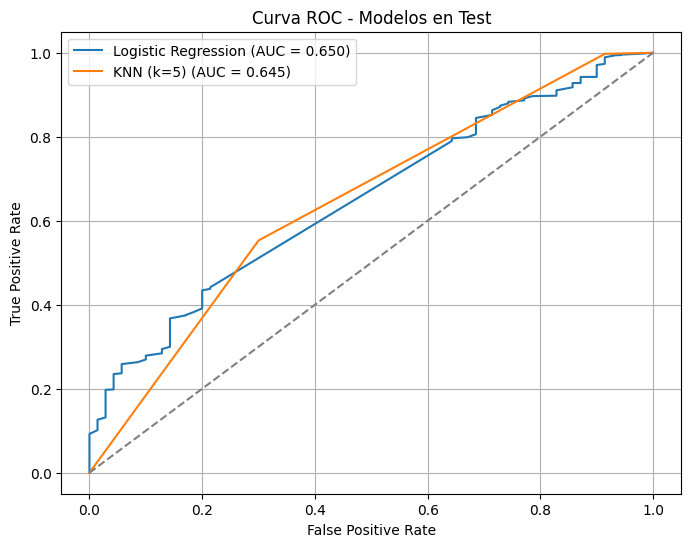


Modelo seleccionado: Logistic Regression

Proporción de personas no respondieron predichas como desocupadas: 0.000


C:\Users\choco\AppData\Local\Temp\ipykernel_4440\53615950.py:100: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datos_nuevos = pd.concat([datos_2024, datos_2004], ignore_index=True)


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#Cargar datos principal
ruta = "C:/Users/Choco/Downloads/base_respondieron_patagonia.csv"
datos = pd.read_csv(ruta, low_memory=False)

#Filtrar ocupados y desocupados
datos = datos[datos['ESTADO'].isin(['1', '2', 'Ocupado', 'Desocupado'])].copy()

#Variables numéricas y binarias
datos['edad'] = pd.to_numeric(datos['CH06'], errors='coerce')
datos['educ'] = pd.to_numeric(datos['PP07H'], errors='coerce')
datos['mujer'] = datos['CH04'].replace({1: 0, 2: 1, 9: np.nan})

#Completar valores faltantes
datos['edad'] = datos['edad'].fillna(datos['edad'].median())
datos['educ'] = datos['educ'].fillna(datos['educ'].median())
datos['mujer'] = datos['mujer'].fillna(datos['mujer'].mode()[0])

#Crear variable edad al cuadrado
datos['edad2'] = datos['edad'] ** 2

#Crear variable binaria de ocupación
datos['ocupacion'] = datos['ESTADO'].replace({'1': 1, 'Ocupado': 1, '2': 0, 'Desocupado': 0}).astype(int)

#Dataframe para modelado
modelo = datos[['edad', 'edad2', 'educ', 'mujer', 'ocupacion']].dropna()

#Separar X e y
X = modelo[['edad', 'edad2', 'educ', 'mujer']]
y = modelo['ocupacion']

#División train/test estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444, stratify=y
)

#Entrenar modelos
logit = LogisticRegression(solver='liblinear', random_state=444)
logit.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Evaluar modelos en test
def evaluar_modelo(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:, 1]
    else:
        # KNN siempre tiene predict_proba, pero por si acaso:
        y_prob = y_pred
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    print(f"\n{nombre} - Accuracy: {acc:.3f}")
    print(f"{nombre} - AUC: {auc:.3f}")
    print(f"{nombre} - Matriz de confusión:\n{cm}")
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc:.3f})')
    return acc, auc, cm

plt.figure(figsize=(8,6))
acc_logit, auc_logit, cm_logit = evaluar_modelo(logit, X_test, y_test, 'Logistic Regression')
acc_knn, auc_knn, cm_knn = evaluar_modelo(knn, X_test, y_test, 'KNN (k=5)')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelos en Test')
plt.legend()
plt.grid(True)
plt.savefig('curva_roc.png', bbox_inches='tight', dpi=300)
plt.show()

#Selección del mejor modelo según AUC (o accuracy si querés otro criterio)
if auc_logit >= auc_knn:
    mejor_modelo = logit
    print("\nModelo seleccionado: Logistic Regression")
else:
    mejor_modelo = knn
    print("\nModelo seleccionado: KNN (k=5)")

#Cargar archivos(no respondieron)
ruta_2024 = "C:/Users/Choco/Downloads/norespondieron_2024.csv"
ruta_2004 = "C:/Users/Choco/Downloads/norespondieron_2004.csv"
datos_2024 = pd.read_csv(ruta_2024, low_memory=False)
datos
#Cargar archivos(no respondieron)
ruta_2024 = "C:/Users/Choco/Downloads/norespondieron_2024.csv"
ruta_2004 = "C:/Users/Choco/Downloads/norespondieron_2004.csv"
datos_2024 = pd.read_csv(ruta_2024, low_memory=False)
datos_2004 = pd.read_csv(ruta_2004, low_memory=False)

# Unir archivos nuevos
datos_nuevos = pd.concat([datos_2024, datos_2004], ignore_index=True)

# Crear variables igual que antes en un df auxiliar
nuevas_cols = pd.DataFrame({
    'edad': pd.to_numeric(datos_nuevos['CH06'], errors='coerce'),
    'educ': pd.to_numeric(datos_nuevos['PP07H'], errors='coerce'),
    'mujer': datos_nuevos['CH04'].replace({1: 0, 2: 1, 9: np.nan}),
})

# Completar valores faltantes con las medianas y modas del dataset original
nuevas_cols['edad'] = nuevas_cols['edad'].fillna(datos['edad'].median())
nuevas_cols['educ'] = nuevas_cols['educ'].fillna(datos['educ'].median())
nuevas_cols['mujer'] = nuevas_cols['mujer'].fillna(datos['mujer'].mode()[0])

# Edad al cuadrado
nuevas_cols['edad2'] = nuevas_cols['edad'] ** 2

# Concatenar columnas nuevas a datos_nuevos
datos_nuevos = pd.concat([datos_nuevos.reset_index(drop=True), nuevas_cols.reset_index(drop=True)], axis=1)

# Predecir ocupacion usando el mejor modelo
X_nuevos = nuevas_cols[['edad', 'edad2', 'educ', 'mujer']]
datos_nuevos['prob_ocupado'] = mejor_modelo.predict_proba(X_nuevos)[:, 1]
datos_nuevos['ocupacion_predicha'] = (datos_nuevos['prob_ocupado'] >= 0.5).astype(int)

# Proporción desocupados detectados
num_desocupados = (datos_nuevos['ocupacion_predicha'] == 0).sum()
total_norespondieron = len(datos_nuevos)
proporcion_desocupados = num_desocupados / total_norespondieron
print(f"\nProporción de personas no respondieron predichas como desocupadas: {proporcion_desocupados:.3f}")
